<a href="https://colab.research.google.com/github/SreeramAdari/Data_Science_Assignmnents/blob/main/XGBM_%26_LGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
 PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


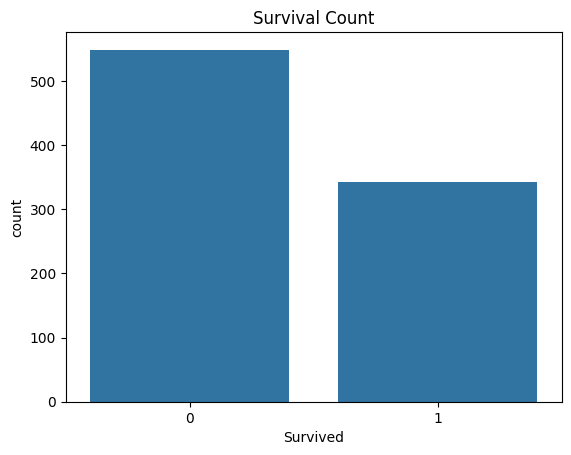

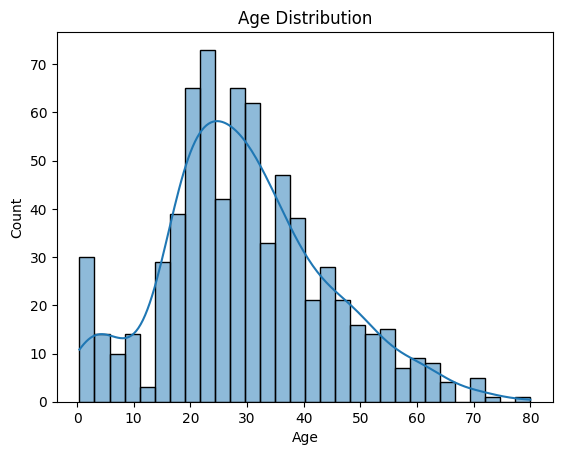

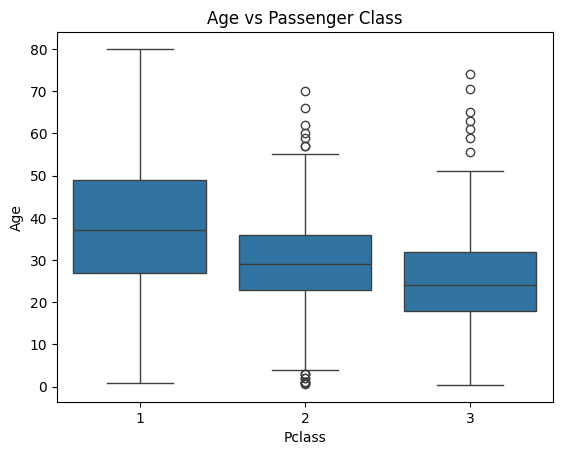

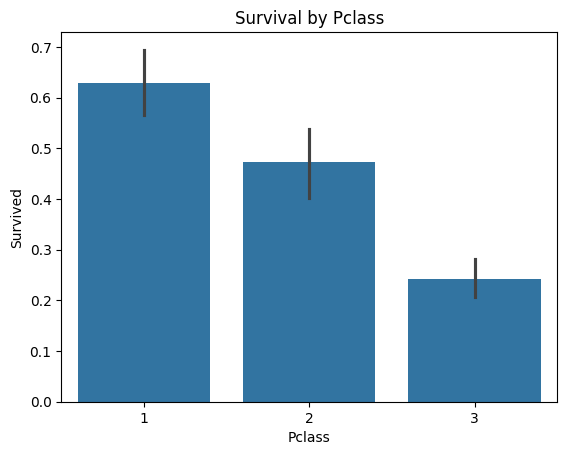

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:16:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Comparison of Models:

      Model  Accuracy  Precision    Recall  F1 Score
0  LightGBM  0.832402   0.797297  0.797297  0.797297
1   XGBoost  0.810056   0.785714  0.743243  0.763889
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:16:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:16:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:16:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:16:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



LightGBM CV Accuracy: 0.8294331805913
XGBoost CV Accuracy: 0.8193584834599209


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:16:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import lightgbm as lgb
import xgboost as xgb

# Load the data
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

# Combine train and test for preprocessing
data = pd.concat([train_df, test_df], sort=False)

# --------------------------- EDA ---------------------------
print("Missing Values:\n", data.isnull().sum())

# Visualizations
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.show()

sns.histplot(data=train_df, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title("Age vs Passenger Class")
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title("Survival by Pclass")
plt.show()

# --------------------------- Data Preprocessing ---------------------------
# Fill missing Age with median by Pclass
data['Age'] = data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Fill missing Embarked with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Fill missing Fare in test set with median
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Drop Cabin due to many missing values
data.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# Encode categorical features
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

# Separate train and test sets again
train = data[:len(train_df)]
test = data[len(train_df):]

X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------- LightGBM ---------------------------
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_val)

print("\nLightGBM Classification Report:\n")
print(classification_report(y_val, y_pred_lgbm))

# --------------------------- XGBoost ---------------------------
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)

print("\nXGBoost Classification Report:\n")
print(classification_report(y_val, y_pred_xgb))

# --------------------------- Comparison ---------------------------
metrics = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_val, y_pred_lgbm), accuracy_score(y_val, y_pred_xgb)],
    'Precision': [precision_score(y_val, y_pred_lgbm), precision_score(y_val, y_pred_xgb)],
    'Recall': [recall_score(y_val, y_pred_lgbm), recall_score(y_val, y_pred_xgb)],
    'F1 Score': [f1_score(y_val, y_pred_lgbm), f1_score(y_val, y_pred_xgb)]
})

print("\nComparison of Models:\n")
print(metrics)

# --------------------------- Cross Validation ---------------------------
lgbm_scores = cross_val_score(lgbm_model, X, y, cv=5)
xgb_scores = cross_val_score(xgb_model, X, y, cv=5)

print("\nLightGBM CV Accuracy:", np.mean(lgbm_scores))
print("XGBoost CV Accuracy:", np.mean(xgb_scores))


Both LightGBM and XGBoost are powerful gradient boosting models with excellent accuracy for structured data. While LightGBM slightly outperformed XGBoost on this dataset, the difference is minimal. The choice between the two may come down to training speed, feature support, and ecosystem compatibility.

For production environments, testing both models along with proper tuning and feature engineering is recommended for optimal results.